In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models

In [3]:
dataDir='/content/drive/MyDrive/ColabNotebooks/data/'
C = 4
classes = os.listdir(dataDir)
classes = sorted(classes)
print(classes)

['chech', 'goc', 'te']


In [4]:
# Hàm thống kê số lượng ảnh của mỗi lớp
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label[0:3], num_images[0:3]

In [5]:
# Hiển thị thống kê
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)

['goc', 'chech', 'te']
[13, 14, 13]


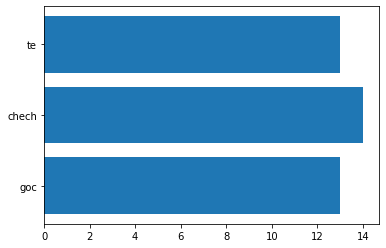

Total images: 40


In [6]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()
print('Total images: %d' %(sum(num_images)))

In [7]:
def LoadData(dataDir,new_size=None):
    if not new_size is None:
        img_rows, img_cols = new_size
    classes=[]
    for _,dirs,_ in os.walk(dataDir):
        classes=dirs
        break  
    num_classes=len(classes) 
    print(classes)   
    classes = sorted(classes)
    print(classes) 
    X_tr=[]
    Y_tr=[]
    for idx,cl in enumerate(classes):
        print(cl)
        for _,_,files in os.walk(dataDir+cl+'/'):               
            l=len(files)
            for f in files:
                r=np.random.randint(100)
                img_path=dataDir+cl+'/'+f
                img=cv.imread(img_path)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                if not new_size is None:
                    img=cv.resize(img,(img_rows,img_cols))
                X_tr.append(img)
                Y_tr.append(cl)                  
    X_tr=np.array(X_tr)     
    Y_tr=np.array(Y_tr)
    return X_tr, Y_tr

In [8]:
img_train,label_train=LoadData(dataDir,None)
le = preprocessing.LabelEncoder()
le.fit(classes)
label_train = le.transform(label_train)

['goc', 'chech', 'te']
['chech', 'goc', 'te']
chech
goc
te


In [9]:
idxs=np.random.permutation(len(img_train))
print(idxs)

[18 11 29 28 17 22  5 23  4  7 14 13  3 16  2 10 33  9 12 38 32 26 27 24
  8  0 37 19 36 25 34 21 20 39 31  6  1 30 15 35]


img for train: 40
label for train: 40


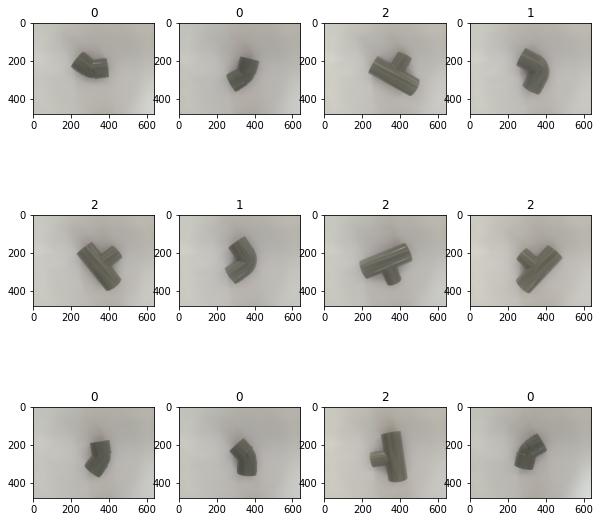

In [10]:
print("img for train: %d" % (len(img_train)))
print("label for train: %d" % (len(label_train)))


"""
Hiển thị một số ảnh trong tập huấn luyện
"""

idxs=np.random.permutation(len(img_train))
plt.figure(figsize = (10,10))
for i in range(12):  # Lấy ngẫu nhiên 12 mẫu trong tập train
    idx=idxs[i]
    plt.subplot(3,4,i+1)
    plt.imshow(img_train[idx],norm=NoNorm())
    #plt.title(labels[label_train[idx]])
    plt.title(label_train[idx])
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_train[0].shape) )
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.25))
#model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(classes)))
model.summary()
model.compile(optimizer='nadam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
   metrics=['accuracy'])
history = model.fit(img_train, label_train, epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 476, 636, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 238, 318, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 236, 316, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 596608)            0

In [14]:
history = model.fit(img_train, label_train, epochs=3)

Epoch 1/3
2/2 [==============================] - 1s 110ms/step - loss: 28.0675 - accuracy: 0.3250
Epoch 2/3
2/2 [==============================] - 1s 108ms/step - loss: 0.8188 - accuracy: 0.9250
Epoch 3/3
2/2 [==============================] - 1s 109ms/step - loss: 0.8361 - accuracy: 0.9750


In [15]:
model.save("/content/drive/MyDrive/ColabNotebooks/model/")

In [13]:
img_train[0].shape

(480, 640, 3)